In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Fixed_NSBRD_Weather_2020_2023.csv"
df = pd.read_csv(file_path)

# Convert Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract useful time features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

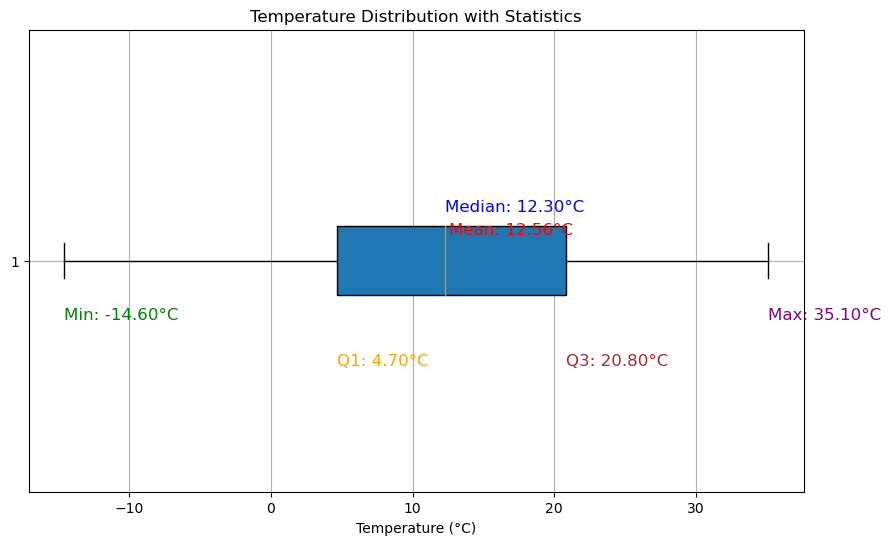

In [2]:
### 1. Temperature Distribution - Boxplot ###
# Compute temperature statistics for annotations
mean_temp = df['Temperature'].mean()
median_temp = df['Temperature'].median()
min_temp = df['Temperature'].min()
max_temp = df['Temperature'].max()
q1 = df['Temperature'].quantile(0.25)
q3 = df['Temperature'].quantile(0.75)

# Create a boxplot with annotations
plt.figure(figsize=(10, 6))
box = plt.boxplot(df['Temperature'], vert=False, patch_artist=True)

# Annotate the boxplot with statistics
plt.text(mean_temp, 1.05, f'Mean: {mean_temp:.2f}°C', verticalalignment='bottom', fontsize=12, color='red')
plt.text(median_temp, 1.1, f'Median: {median_temp:.2f}°C', verticalalignment='bottom', fontsize=12, color='blue')
plt.text(min_temp, 0.9, f'Min: {min_temp:.2f}°C', verticalalignment='top', fontsize=12, color='green')
plt.text(max_temp, 0.9, f'Max: {max_temp:.2f}°C', verticalalignment='top', fontsize=12, color='purple')
plt.text(q1, 0.8, f'Q1: {q1:.2f}°C', verticalalignment='top', fontsize=12, color='orange')
plt.text(q3, 0.8, f'Q3: {q3:.2f}°C', verticalalignment='top', fontsize=12, color='brown')

# Labels and title
plt.xlabel("Temperature (°C)")
plt.title("Temperature Distribution with Statistics")
plt.grid()
plt.show()


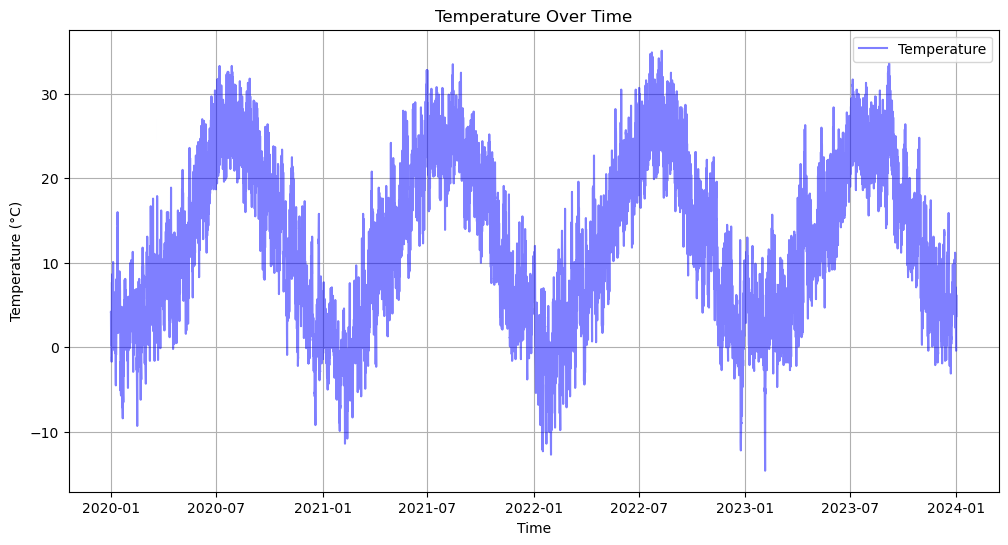

In [3]:
### 2. Temperature Over Time ###
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Temperature'], label="Temperature", color='b', alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Time")
plt.legend()
plt.grid()
plt.show()

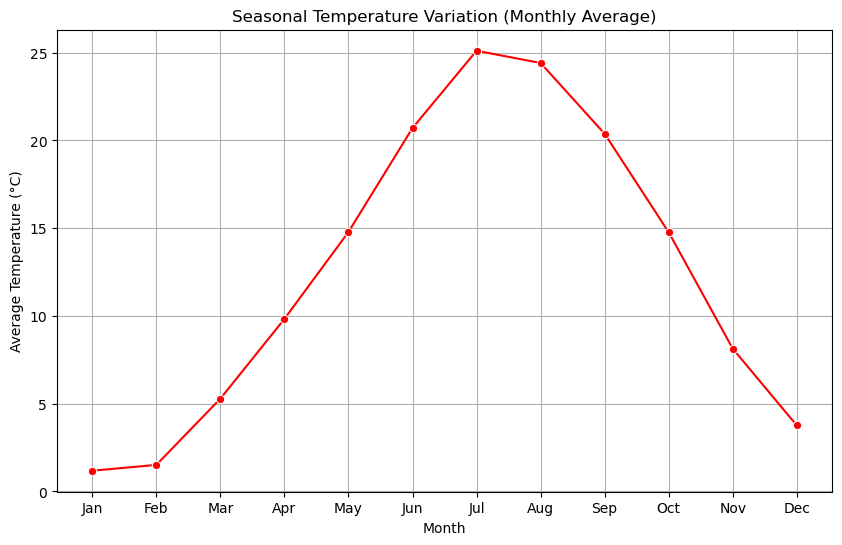

In [4]:
### 3. Seasonal Temperature Variation (Monthly Average) ###
monthly_avg_temp = df.groupby('Month')['Temperature'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values, marker="o", linestyle="-", color="r")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Seasonal Temperature Variation (Monthly Average)")
plt.xticks(range(1, 13), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

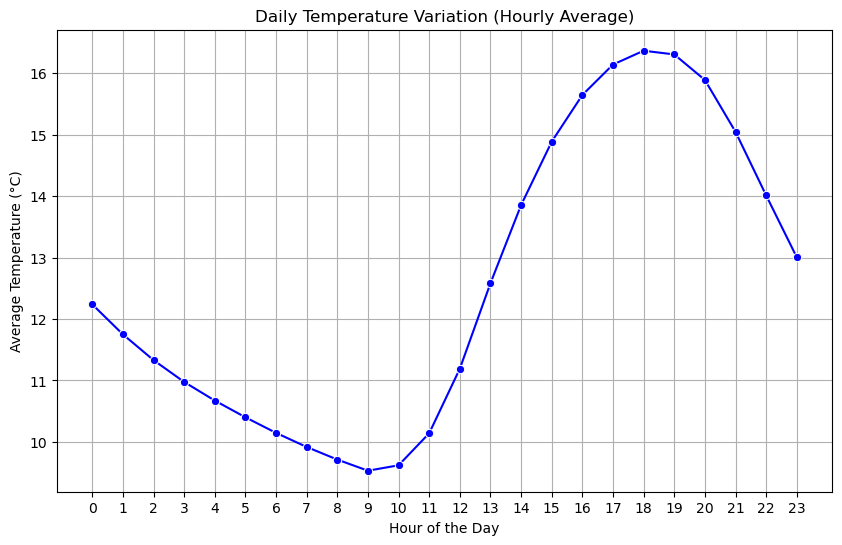

In [5]:
### 4. Daily Temperature Variation (Hourly Average) ###
hourly_avg_temp = df.groupby('Hour')['Temperature'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg_temp.index, y=hourly_avg_temp.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Temperature (°C)")
plt.title("Daily Temperature Variation (Hourly Average)")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

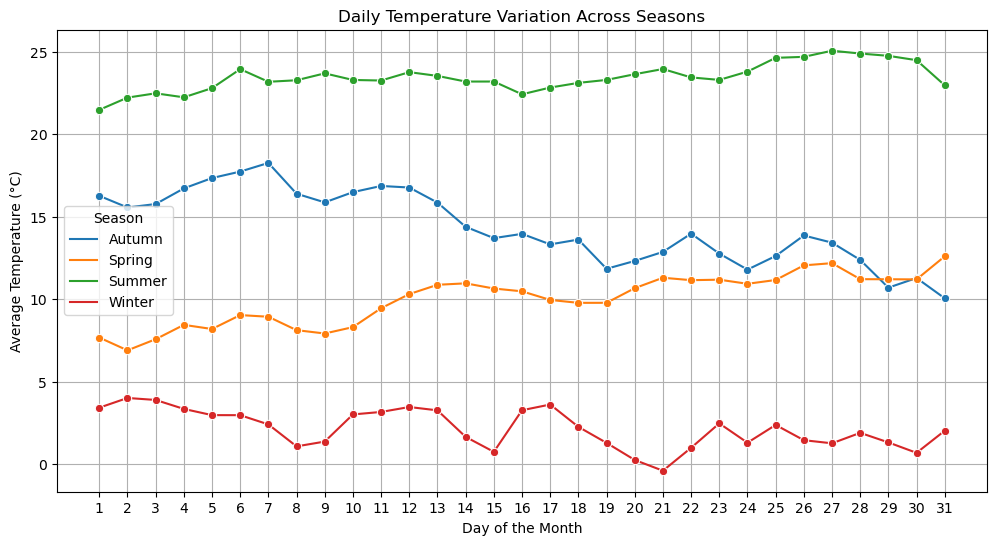

In [6]:
### 5. Daily Temperature Variation Across Seasons ###
# Define seasons based on months
df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

seasonal_daily_avg_temp = df.groupby(['Season', 'Day'])['Temperature'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_daily_avg_temp, x="Day", y="Temperature", hue="Season", marker="o")
plt.xlabel("Day of the Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Daily Temperature Variation Across Seasons")
plt.xticks(range(1, 32))
plt.legend(title="Season")
plt.grid()
plt.show()

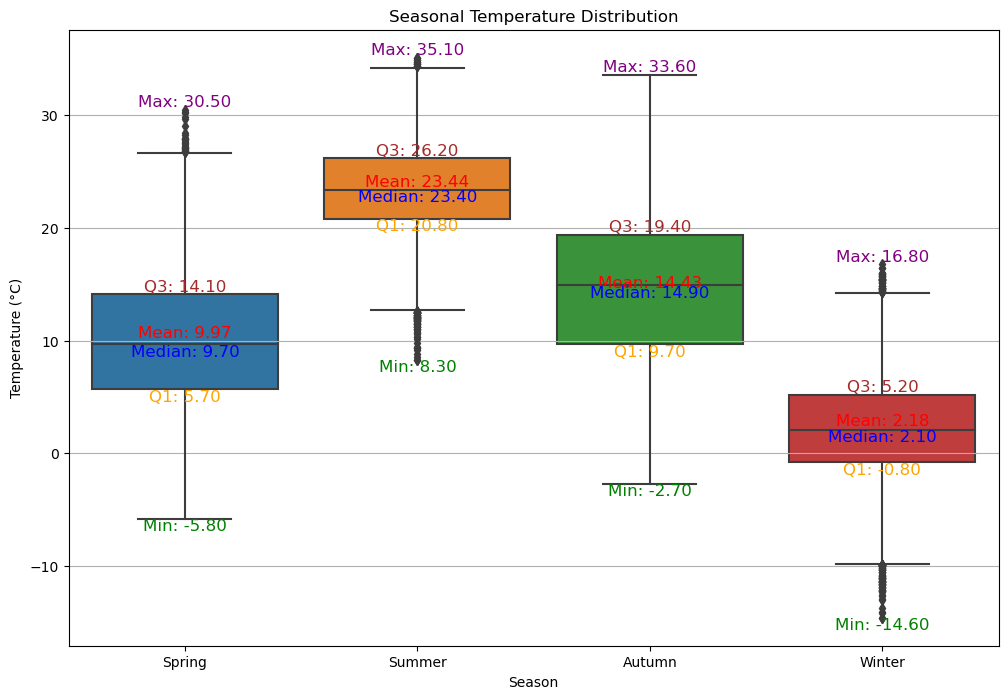

In [9]:
plt.figure(figsize=(12, 8))
box = sns.boxplot(x='Season', y='Temperature', data=df, order=['Spring', 'Summer', 'Autumn', 'Winter'])

season_stats = df.groupby('Season')['Temperature'].describe()

for i, season in enumerate(['Spring', 'Summer', 'Autumn', 'Winter']):
    mean_val = season_stats.loc[season, 'mean']
    median_val = season_stats.loc[season, '50%']
    min_val = season_stats.loc[season, 'min']
    max_val = season_stats.loc[season, 'max']
    q1 = season_stats.loc[season, '25%']
    q3 = season_stats.loc[season, '75%']
    
    plt.text(i, mean_val, f'Mean: {mean_val:.2f}', ha='center', va='bottom', color='red', fontsize=12)
    plt.text(i, median_val, f'Median: {median_val:.2f}', ha='center', va='top', color='blue', fontsize=12)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='top', color='green', fontsize=12)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='bottom', color='purple', fontsize=12)
    plt.text(i, q1, f'Q1: {q1:.2f}', ha='center', va='top', color='orange', fontsize=12)
    plt.text(i, q3, f'Q3: {q3:.2f}', ha='center', va='bottom', color='brown', fontsize=12)

plt.xlabel("Season")
plt.ylabel("Temperature (°C)")
plt.title("Seasonal Temperature Distribution")
plt.grid(axis='y')

plt.show()


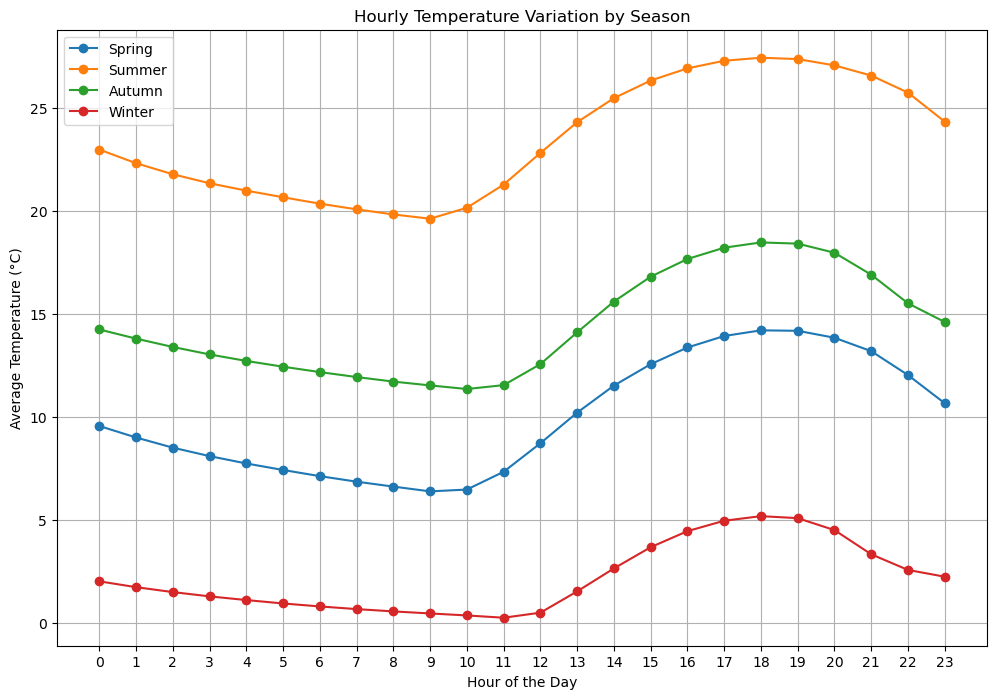

In [7]:
plt.figure(figsize=(12, 8))
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    hourly_avg_temp = df[df['Season'] == season].groupby('Hour')['Temperature'].mean()
    plt.plot(hourly_avg_temp.index, hourly_avg_temp.values, marker="o", linestyle="-", label=season)

plt.xlabel("Hour of the Day")
plt.ylabel("Average Temperature (°C)")
plt.title("Hourly Temperature Variation by Season")
plt.xticks(range(0, 24))
plt.legend()
plt.grid()

plt.show()
